# Crop Recommender System for Smart Agriculture
#### By Ubong Ben


### INTRODUCTION

Agriculture, the backbone of civilizations since time immemorial, plays a pivotal role in the development and sustenance of nations (Savory and Duncan, 2016). Sustainable agriculture has been ascertained as one of the pillers for ensuring food security, driving economic growth, fostering rural development,and spuring technological advancements (Nadiia et al., 2019). Several researchers as well as practitioner have decried the criticality of recognizing and prioritizing investments in agriculture, implement sustainable practices, and support farmers and rural communities to harness the full potential of this vital sector. This brings smart agriculture into context. 

Climate change have been recognized as one of the most influencial hinderers of smart agriculture around the world. Climate change impacts agriculture's sustainability through different factors affecting the economy, food security, and decision-makers’ choices (Karimi et al., 2018). While there have been advances in the improvement of soil through fertilizer optimization, farmers are still suffering from poor decisions with regards to selecting the right crops for cultivations at a particular time and in a particular location. 

This project would focuses on the design of a rubost machine learning model that would intelligently recommend the most suitable crop to be planted based on on the climate condition of at a particular geographic location and season. 

### Project Objective
To develop a intelligent system for the recommendation of crops based on in situ climatic indices.

 ### Importing libraries

In [33]:
#basic data wrangling and plotting libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#sklearn for maching learning
from sklearn import metrics
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import pickle

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder


#to eliminate ugly warnings
import warnings
warnings.filterwarnings('ignore')

## Exploratory Data Analysis

In [2]:
#import dataet
df = pd.read_csv('../Data/crop_climate_dataset.csv')

In [3]:
#have a peek into the dataset to obtain general knowledge
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
#Lets hope that there are no mechanical inputs at the end. Morevover, how large is out dataset
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [5]:
#lets see the shape
df.shape

(2200, 8)

In [6]:
#Let us get a list of the columns
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [7]:
#Now we wish to recommend crops that could be planted. What crops are available for our dataset?

df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [8]:
#Are our data types acceptable, machine learning models mosly work well on integers and floats.
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

Seems that all our featurs are in order

In [9]:
#Let us check for bias. We will not want information for some features to be over skewed when compared to other features. 
df['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

<AxesSubplot:>

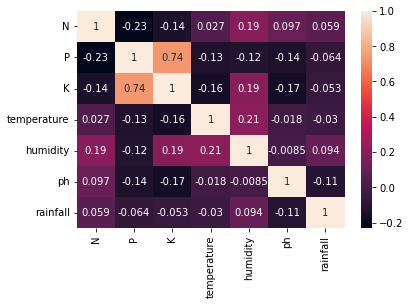

In [10]:
#We now need to check for correlation. If our features are too correlated, they may leak information to the label
sns.heatmap(df.corr(),annot=True)

There does not seem to be any outragous correlations

## Feature Engineering

We will need to seperate the label from the features before carrying out any machine learning activity

In [11]:
#drop label column to create features and isolate the column to obtain target
X = df.drop('label', axis=1)
y = df['label']



In [12]:
# Initialzing empty lists to append all model's name and corresponding name
acc = []
model = []

Considering that we had already ascertained that our data is suitable for modelling operation. We now split it into training and testing datasets. 

In [13]:
# Splitting into train and test data. random_state is for reproducability
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state =2)

# Modelling

For the recommender system and for this project, we would be trialing six machine learning models. The model with the best performance would subsequently be adopted for our smart crop system. The models we would use are:

* Logistic Regression model
* Random forest model
* Support vector machine
* Decision tree model
* Guassian Naive Bayes model
* XGBoost model



# Logistic Regression


Logistic Regression:
Logistic regression is a widely used statistical model for binary classification. It assumes a linear relationship between the predictors and the logarithm of the odds of the event. By fitting the data to a logistic curve, it predicts the probability of an event occurring. 


In [14]:
log_regression = LogisticRegression(random_state=2)

log_regression.fit(X_train,y_train)

y_predict = log_regression.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_predict)
acc.append(accuracy)
model.append('Logistic Regression')

# compute accuracy
print("Accuracy (Logistic Regression):", accuracy)

#classification report for logistic regression
print(classification_report(y_test,y_predict))

Accuracy (Logistic Regression): 0.9621212121212122
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        28
      banana       1.00      1.00      1.00        26
   blackgram       0.92      0.82      0.87        28
    chickpea       1.00      1.00      1.00        29
     coconut       1.00      1.00      1.00        31
      coffee       1.00      1.00      1.00        33
      cotton       0.91      0.94      0.92        31
      grapes       1.00      1.00      1.00        29
        jute       0.86      0.94      0.90        33
 kidneybeans       0.97      1.00      0.98        30
      lentil       0.91      1.00      0.96        32
       maize       0.94      0.91      0.92        32
       mango       0.97      1.00      0.99        33
   mothbeans       0.83      0.83      0.83        29
    mungbean       1.00      1.00      1.00        32
   muskmelon       1.00      1.00      1.00        30
      orange       1.00      1

In [15]:
# canculate cross validation score
cross_val = cross_val_score(log_regression,X,y,cv=5)
print('Cross_val score: ', cross_val)

Cross_val score:  [0.95       0.96590909 0.94772727 0.96818182 0.94318182]


# Random Forest

The algorithm is based on the concept of ensemble learning, which is a process of combining multiple classifiers to solve a complex problem and to improve the performance of the model. It operates by constructing a multitude of decision trees at training time.

<img src="https://www.google.com/imgres?imgurl=https%3A%2F%2Fwww.tibco.com%2Fsites%2Ftibco%2Ffiles%2Fmedia_entity%2F2021-05%2Frandom-forest-diagram.svg&tbnid=qmwaTgaID5K4OM&vet=12ahUKEwjljdD4kY7_AhU3mScCHQ5IBQQQMygBegUIARDgAQ..i&imgrefurl=https%3A%2F%2Fwww.tibco.com%2Freference-center%2Fwhat-is-a-random-forest&docid=tWxwg9CB2qnOxM&w=820&h=627&q=random%20forest%20model&ved=2ahUKEwjljdD4kY7_AhU3mScCHQ5IBQQQMygBegUIARDgAQ"/>


In [16]:
random_forest = RandomForestClassifier(n_estimators=20, random_state=0)
random_forest.fit(X_train,y_train)

y_predict = random_forest.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_predict)
acc.append(accuracy)
model.append('Random Forest')

# compute accuracy
print("Accuracy (Random forest):", accuracy)

#classification report for logistic regression
print(classification_report(y_test,y_predict))

Accuracy (Random forest): 0.9893939393939394
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        28
      banana       1.00      1.00      1.00        26
   blackgram       0.97      1.00      0.98        28
    chickpea       1.00      1.00      1.00        29
     coconut       1.00      1.00      1.00        31
      coffee       1.00      1.00      1.00        33
      cotton       1.00      1.00      1.00        31
      grapes       1.00      1.00      1.00        29
        jute       0.89      0.94      0.91        33
 kidneybeans       1.00      1.00      1.00        30
      lentil       1.00      1.00      1.00        32
       maize       1.00      1.00      1.00        32
       mango       1.00      1.00      1.00        33
   mothbeans       1.00      0.97      0.98        29
    mungbean       1.00      1.00      1.00        32
   muskmelon       1.00      1.00      1.00        30
      orange       1.00      1.00   

In [17]:
# canculate cross validation score
cross_val = cross_val_score(random_forest,X,y,cv=5)
print('Cross_val score: ', cross_val)

Cross_val score:  [0.99772727 0.99545455 0.99772727 0.99318182 0.98863636]


# Decision Tree

The decision tree model is a powerful tool in machine learning It is a graphical representation of a series of decisions and their potential outcomes, resembling a tree structure. Each internal node represents a decision based on a specific feature, while each leaf node represents a class label or a final outcome. By recursively splitting the dataset based on different attributes, decision trees effectively partition the data, enabling accurate predictions and insights. 

In [18]:
Decision_tree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

Decision_tree.fit(X_train,y_train)

y_predict = Decision_tree.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_predict)
acc.append(accuracy)
model.append('Decision Tree')

# compute accuracy
print("Accuracy (Decision Tree):", accuracy)

#classification report for logistic regression
print(classification_report(y_test,y_predict))

Accuracy (Decision Tree): 0.8590909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        28
      banana       1.00      1.00      1.00        26
   blackgram       0.65      1.00      0.79        28
    chickpea       1.00      1.00      1.00        29
     coconut       0.94      1.00      0.97        31
      coffee       1.00      1.00      1.00        33
      cotton       1.00      0.97      0.98        31
      grapes       1.00      1.00      1.00        29
        jute       0.50      0.03      0.06        33
 kidneybeans       0.00      0.00      0.00        30
      lentil       0.63      1.00      0.77        32
       maize       0.97      1.00      0.98        32
       mango       1.00      1.00      1.00        33
   mothbeans       0.00      0.00      0.00        29
    mungbean       1.00      1.00      1.00        32
   muskmelon       1.00      1.00      1.00        30
      orange       1.00      1.00   

In [19]:
# Cross validation score (Decision Tree)
cross_val = cross_val_score(Decision_tree, X,y,cv=5)
print('Cross validation score: ', cross_val)

Cross validation score:  [0.93636364 0.90909091 0.91818182 0.87045455 0.93636364]


# Guassian Naive Bayes

Gaussian Naive Bayes is a machine learning algorithm based on the Bayes' theorem and the assumption of feature independence. It assumes that the features follow a Gaussian distribution. The model calculates the conditional probability of each class of given the features and selects the class with the highest probability as the prediction. 

In [20]:
Naive_b = GaussianNB()

Naive_b.fit(X_train,y_train)

y_predict = Naive_b.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_predict)
acc.append(accuracy)
model.append('Guassian Naive baise')

# compute accuracy
print("Accuracy (Guassian Naive baise):", accuracy)

#classification report for logistic regression
print(classification_report(y_test,y_predict))

Accuracy (Guassian Naive baise): 0.9924242424242424
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        28
      banana       1.00      1.00      1.00        26
   blackgram       1.00      1.00      1.00        28
    chickpea       1.00      1.00      1.00        29
     coconut       1.00      1.00      1.00        31
      coffee       1.00      1.00      1.00        33
      cotton       1.00      1.00      1.00        31
      grapes       1.00      1.00      1.00        29
        jute       0.89      0.97      0.93        33
 kidneybeans       1.00      1.00      1.00        30
      lentil       1.00      1.00      1.00        32
       maize       1.00      1.00      1.00        32
       mango       1.00      1.00      1.00        33
   mothbeans       1.00      1.00      1.00        29
    mungbean       1.00      1.00      1.00        32
   muskmelon       1.00      1.00      1.00        30
      orange       1.00      

In [21]:
# Cross validation score (NaiveBayes)
cross_val = cross_val_score(Naive_b,X,y,cv=5)
print('Cross validation score: ', cross_val)

Cross validation score:  [0.99772727 0.99545455 0.99545455 0.99545455 0.99090909]


# Support Vector Machine (SVM)

Support Vector Machine (SVM) is a powerful supervised learning algorithm used for both classification and regression tasks. It aims to find an optimal hyperplane that separates the data into different classes, maximizing the margin between them. SVMs are particularly effective in handling both linearly separable and non-linearly separable datasets through the use of kernel functions. The algorithm identifies support vectors, which are the data points closest to the decision boundary, and uses them to make predictions. 

In [22]:
# fit scaler on training data
scaler = MinMaxScaler().fit(X_train)
X_train_normalized = scaler.transform(X_train)

# transform testing dataabs
X_test_normalized = scaler.transform(X_test)
SVM = SVC(kernel='poly', degree=3, C=1)
SVM.fit(X_train_normalized,y_train)
y_predict  = SVM.predict(X_test_normalized)

# compute accuracy
accuracy = metrics.accuracy_score(y_test, y_predict)
acc.append(accuracy)
model.append('Support Vector Machine')


print("Accuracy (Support Vector Machine):", accuracy)

#classification report for logistic regression
print(classification_report(y_test,y_predict))

Accuracy (Support Vector Machine): 0.9833333333333333
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        28
      banana       1.00      1.00      1.00        26
   blackgram       1.00      1.00      1.00        28
    chickpea       1.00      1.00      1.00        29
     coconut       1.00      1.00      1.00        31
      coffee       1.00      0.97      0.98        33
      cotton       0.97      1.00      0.98        31
      grapes       1.00      1.00      1.00        29
        jute       0.85      0.88      0.87        33
 kidneybeans       1.00      1.00      1.00        30
      lentil       0.97      1.00      0.98        32
       maize       1.00      0.97      0.98        32
       mango       1.00      1.00      1.00        33
   mothbeans       1.00      0.97      0.98        29
    mungbean       1.00      1.00      1.00        32
   muskmelon       1.00      1.00      1.00        30
      orange       1.00    

In [23]:
# Cross validation score 
cross_val = cross_val_score(SVM,X,y,cv=5)
print('Cross validation score: ', cross_val)

Cross validation score:  [0.97954545 0.975      0.98863636 0.98863636 0.98181818]


# XGBoost

XGBoost, short for Extreme Gradient Boosting, is a highly efficient and scalable machine learning algorithm that has gained widespread popularity in both academic research and practical applications. It is an ensemble method that combines multiple weak prediction models, usually decision trees, to create a strong predictive model. XGBoost employs a gradient boosting framework, wherein subsequent models are trained to correct the errors made by previous models. It incorporates regularization techniques to prevent overfitting and offers various hyperparameters for fine-tuning. XGBoost excels in handling large-scale datasets and provides excellent predictive performance.

In [24]:
import xgboost as xgb
XgB = xgb.XGBClassifier()
le = LabelEncoder()
y_train = le.fit_transform(y_train)

XgB.fit(X_train,y_train)
y_predict = XgB.predict(X_test)
y_predict = le.inverse_transform(y_predict)
accuracy = metrics.accuracy_score(y_test, y_predict)
acc.append(accuracy)
model.append('XGBoost')

# compute accuracy
print("Accuracy (XGBoost):", accuracy)

#classification report for logistic regression
print(classification_report(y_test,y_predict))

Accuracy (XGBoost): 0.9954545454545455
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        28
      banana       1.00      1.00      1.00        26
   blackgram       1.00      1.00      1.00        28
    chickpea       1.00      1.00      1.00        29
     coconut       1.00      1.00      1.00        31
      coffee       0.97      1.00      0.99        33
      cotton       1.00      1.00      1.00        31
      grapes       1.00      1.00      1.00        29
        jute       1.00      0.91      0.95        33
 kidneybeans       1.00      1.00      1.00        30
      lentil       1.00      1.00      1.00        32
       maize       1.00      1.00      1.00        32
       mango       1.00      1.00      1.00        33
   mothbeans       1.00      1.00      1.00        29
    mungbean       1.00      1.00      1.00        32
   muskmelon       1.00      1.00      1.00        30
      orange       1.00      1.00      1.0

In [28]:
# Cross validation score 
cross_val = cross_val_score(XgB,X,le.fit_transform(y),cv=5)
print('Cross validation score: ', cross_val)

Cross validation score:  [0.99318182 0.99318182 0.99318182 0.99090909 0.99090909]


## Accuracy Comparison

<AxesSubplot:title={'center':'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

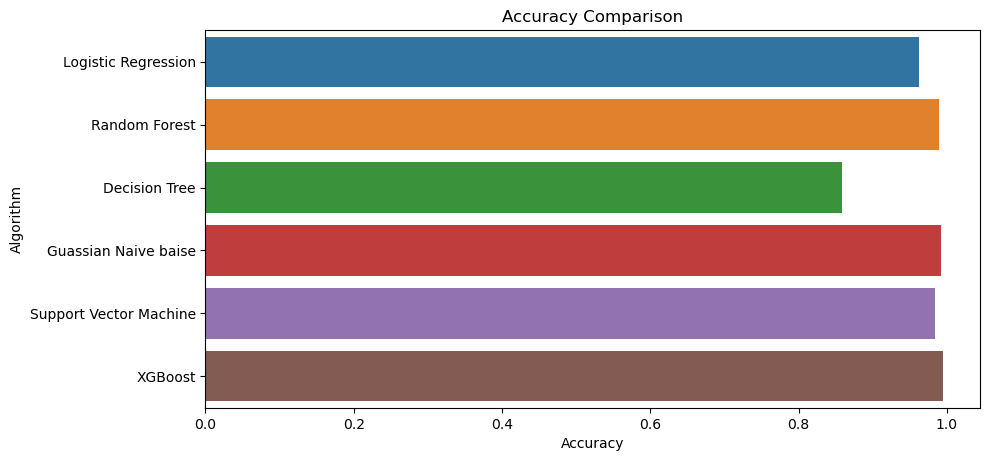

In [29]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,)

In [30]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

Logistic Regression --> 0.9621212121212122
Random Forest --> 0.9893939393939394
Decision Tree --> 0.8590909090909091
Guassian Naive baise --> 0.9924242424242424
Support Vector Machine --> 0.9833333333333333
XGBoost --> 0.9954545454545455


## Making a prediction
Now it seems that the random forest models gives us the best performance. Let us try to use it in making a prediction

In [31]:
data = np.array([[88,23, 30, 31.0232634, 56.782, 7.9, 151.77]])
prediction = random_forest.predict(data)
print('The best crop to cultivate in this climate is: ',prediction)

The best crop to cultivate in this climate is:  ['coffee']


Lets try with different climatic values.

In [32]:
data = np.array([[77, 51, 80, 32, 73.26, 9, 125.7]])
prediction = random_forest.predict(data)
print('The best product to cultivate in this climate is: ',prediction)

The best product to cultivate in this climate is:  ['jute']


Looks Good!!
Now lets save our chosen model as a pickle file for production. 

In [35]:
#saving model as pickle file
our_model = '../models/agricultural_model.pkl'
# Open the file to save as pkl file
model = open(our_model, 'wb')
pickle.dump(random_forest, model)
# Close the pickle instances
model.close()

## Conclusion
In this project, a robust machine learning-based recommendation system was designed for the recommendation of optimal cultiviable crops based on climatatic conditions. 


### References

Karimi, V., Karami, E. and Keshavarz, M. (2018) ‘Climate change and agriculture: Impacts and adaptive responses in Iran’, Journal of Integrative Agriculture [Preprint]. Available at: https://doi.org/10.1016/S2095-3119(17)61794-5.

Nadiia, R., Anatoliy, O. and Kateryna, K. (2019) ‘Sustainable Development of Agriculture: Modeling of Strategic Management in Transition Countries’, International Journal of Economics, Business, and Entrepreneurship [Preprint]. Available at: https://doi.org/10.23960/ijebe.v2i1.50.

Savory, A. and Duncan, T. (2016) ‘Regenerating Agriculture to Sustain Civilization’, in Land Restoration: Reclaiming Landscapes for a Sustainable Future. Available at: https://doi.org/10.1016/B978-0-12-801231-4.00023-9.


